In [1]:
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets

boston = datasets.load_boston()


In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
list(boston.keys())

['data', 'target', 'feature_names', 'DESCR', 'filename']

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#convert boston.data (the features) to a pandas dataframe, then change the column names to match the feature names
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
#add another column for the target we want to predict
target = boston.target
boston_df['target'] = target
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


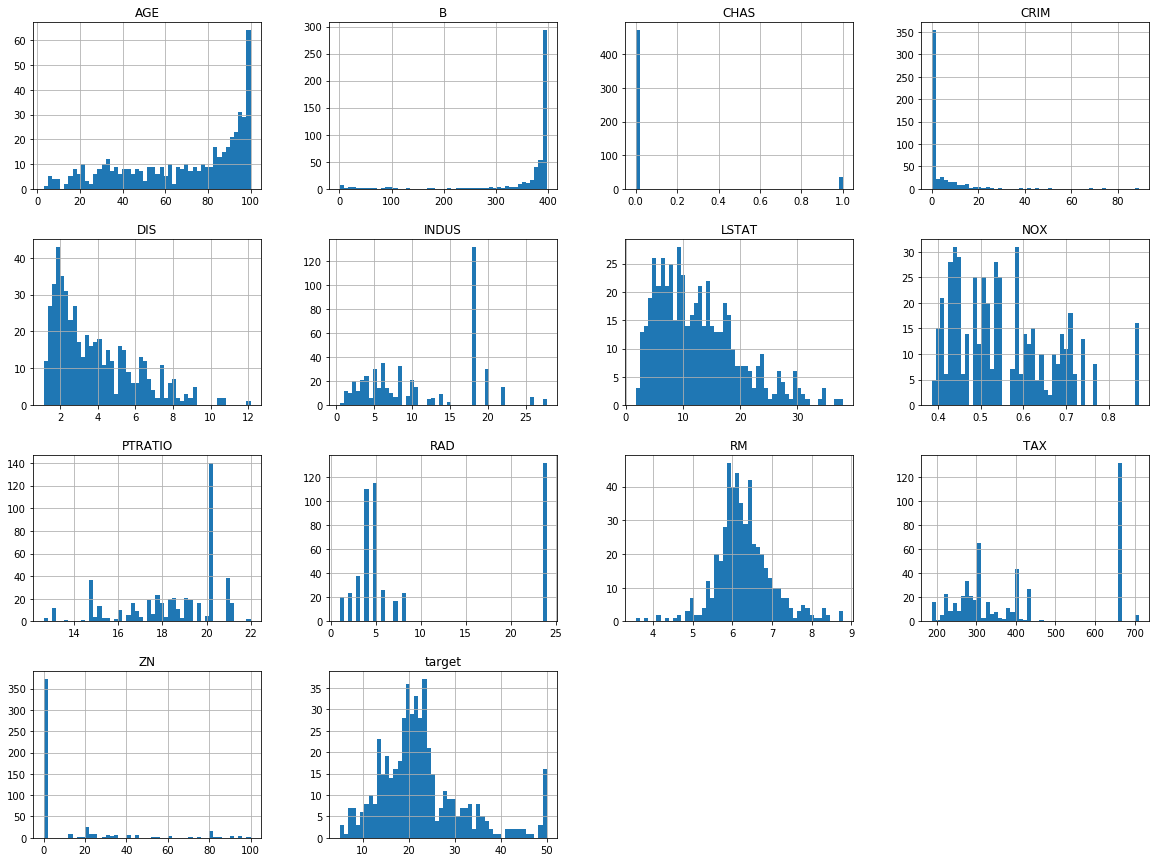

In [8]:
boston_df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
#now we need to split the data into train and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(boston_df, test_size=0.2, random_state=42)

In [10]:
'''EXPLORE THE DATA'''
#now that the test and train sets are made, you can explore the training set
#first make a copy of your train set so you can fuck around with it and not worry about messing up the actual training set
boston_df = train_set.copy()

In [11]:
#compute correlations between every pair of attributes
#this will tell you which values 
corr_matrix = boston_df.corr()
corr_matrix['target'].sort_values(ascending=False)

target     1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: target, dtype: float64

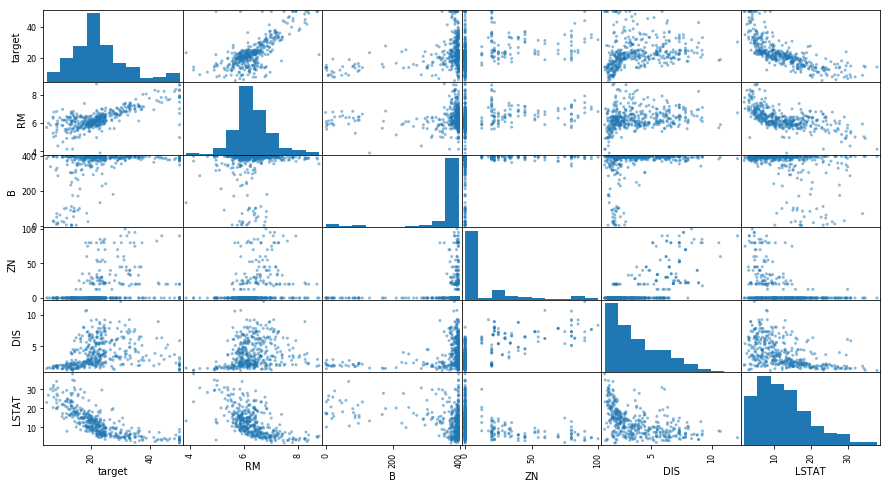

In [12]:
#this also helps you find correlations between different attributes
#this is similar to the corr_matrix except it lets you visualize the data
from pandas.plotting import scatter_matrix
attributes = ['target', 'RM', 'B', 'ZN', 'DIS', 'LSTAT']
scatter_matrix(boston_df[attributes], figsize=(15,8))
plt.show()

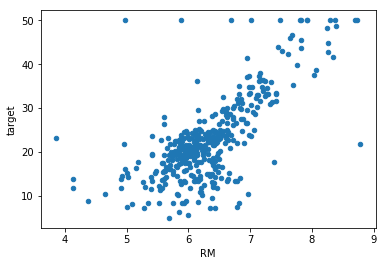

In [13]:
boston_df.plot(kind='scatter', x='RM', y='target')

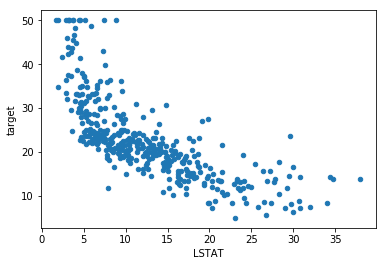

In [14]:
boston_df.plot(kind='scatter', x='LSTAT', y='target')

In [15]:
'''Data Cleaning'''
#now we can start cleaning the data
#we must revert to a clean training set, and we also want to remove the target so that we dont apply 
#transformations to the targets as well
#this is done by dropping the target column, and making another copy of the training set

boston_df = train_set.drop('target', axis=1)
boston_df_target = train_set['target'].copy()

In [16]:
#normally this is when youd want to get rid of missing values
#but in our data we have no missing values anywhere so we wont worry about that
#also youd want to handle text data, by using something like ordinalencoder or one hot encoder
#but again, that does not apply to this dataset

In [17]:
'''Select AND TRAIN A MODEL'''
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])


pipeline.fit(boston_df, boston_df_target)



Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [18]:
some_data = boston_df.iloc[:5]
some_targets = boston_df_target.iloc[:5]



#some_data_prepared = pipeline.fit(some_data, some_targets)
print('Prediction:', pipeline.predict(some_data))
print('Labels:', list(some_targets))

Prediction: [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]
Labels: [12.0, 19.9, 19.4, 13.4, 18.2]


In [19]:
from sklearn.metrics import mean_squared_error

boston_predict = pipeline.predict(boston_df)
lin_mse = mean_squared_error(boston_df_target, boston_predict)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

4.6520331848801675


In [24]:
scaler.fit_transform?

Signature: scaler.fit_transform(X, y=None, **fit_params)
Docstring:
Fit to data, then transform it.

Fits transformer to X and y with optional parameters fit_params
and returns a transformed version of X.

Parameters
----------
X : numpy array of shape [n_samples, n_features]
    Training set.

y : numpy array of shape [n_samples]
    Target values.

Returns
-------
X_new : numpy array of shape [n_samples, n_features_new]
    Transformed array.
File:      c:\users\sebas\anaconda3\lib\site-packages\sklearn\base.py
Type:      method


In [26]:
'''DECISION TREErEG'''
#lets try a different model

'''
Here for some reason the pipeline with the linear regressor included does not work when passing in the value for the tree regressor 
so instead i just applied the scaling function on its own so that it would work instead of the whole pipeline. idk if there is a better,
more efficient way of doing this but it works so im just gonna leave it. If anyone reading this in the future has any ideas on how to make this code
cleaner and sleaker please let me know
'''

from sklearn.tree import DecisionTreeRegressor
scaler = StandardScaler()
boston_predict = scaler.fit_transform(boston_df, boston_df_target)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(boston_predict, boston_df_target)

price_predictions = tree_reg.predict(boston_predict)
tree_mse = mean_squared_error(boston_df_target, price_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [28]:
#obviously, the tree regressor model is overfitting the data, as there is a 0 rmse
#we must split our train set in two for model validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, boston_predict, boston_df_target,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

#now lets look at the results
def display_results(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation', scores.std())

display_results(tree_rmse_scores)

Scores:  [4.0032304  4.40839001 4.75658722 7.22445035 8.59953487 3.57962987
 5.20571801 5.33401819 4.13696749 5.45364557]
Mean:  5.270217197328041
Standard deviation 1.473072228557969


In [29]:
lin_scores = cross_val_score(lin_reg, boston_predict, boston_df_target,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores =np.sqrt(-lin_scores)
display_results(lin_rmse_scores)

Scores:  [3.76298481 4.25110998 5.34719644 6.71464778 4.59265163 5.17395941
 4.43145447 4.5777583  3.6723473  5.77030866]
Mean:  4.829441880454279
Standard deviation 0.889632973074853


In [31]:
'''RANDOM FORREST REGRESSOR'''

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(boston_predict, boston_df_target)
scores = cross_val_score(tree_reg, boston_predict, boston_df_target,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse = np.sqrt(-scores)
display_results(forest_rmse)

Scores:  [3.75944339 4.07517769 4.67943086 7.06887717 5.86640861 3.63627557
 4.59042482 5.34992991 3.28488965 5.41850994]
Mean:  4.772936759858029
Standard deviation 1.1081102034460777


C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
'''Fine tune your model'''
#we now have 3 different models, you just want an idea of a few good options
#now you want to fine tune it

from sklearn.model_selection import GridSearchCV

parameter_grid = [
    {'n_estimators': [6, 20, 60], 'max_features': [4,6,8,10]}, 
    {'bootstrap': [False], 'n_estimators': [6,20], 'max_features': [4,6,8]}
                 ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, parameter_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(boston_predict, boston_df_target)

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [6, 20, 60], 'max_features': [4, 6, 8, 10]}, {'bootstrap': [False], 'n_estimators': [6, 20], 'max_features': [4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [33]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [34]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

4.1945390364464155 {'max_features': 4, 'n_estimators': 6}
3.8305928179113047 {'max_features': 4, 'n_estimators': 20}
3.6870797200408063 {'max_features': 4, 'n_estimators': 60}
4.100694804821279 {'max_features': 6, 'n_estimators': 6}
3.644043415406345 {'max_features': 6, 'n_estimators': 20}
3.6377116194742047 {'max_features': 6, 'n_estimators': 60}
4.19029275293929 {'max_features': 8, 'n_estimators': 6}
3.697224432256615 {'max_features': 8, 'n_estimators': 20}
3.7853580755921956 {'max_features': 8, 'n_estimators': 60}
4.0178379589882 {'max_features': 10, 'n_estimators': 6}
3.784481127049004 {'max_features': 10, 'n_estimators': 20}
3.767957824537285 {'max_features': 10, 'n_estimators': 60}
3.963185492305986 {'bootstrap': False, 'max_features': 4, 'n_estimators': 6}
3.7430561701067564 {'bootstrap': False, 'max_features': 4, 'n_estimators': 20}
3.9071532344073368 {'bootstrap': False, 'max_features': 6, 'n_estimators': 6}
3.8497781696411475 {'bootstrap': False, 'max_features': 6, 'n_estimat

In [ ]:
#from the results above, we see the best score is obtained with max_features: 6 and n_estimators: 60
#(the score is 3.63, which is lower than any other combination of hyperparameter or model we have looked at)
